In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 96


In [4]:
path = Path('/home/mreishus/screenshots')
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs).normalize(imagenet_stats)

In [5]:
data.classes

['7th-saga',
 '90-minutes-european-prime-goal',
 'acrobat-mission',
 'actraiser',
 'actraiser-2',
 'aero-fighters',
 'aero-the-acro-bat',
 'aero-the-acro-bat-2',
 'al-unser-jr-s-road-to-the-top',
 'aladdin',
 'alcahest',
 'alien-vs-predator',
 'american-battle-dome',
 'animaniacs',
 'apocalypse-ii',
 'ardy-lightfoot',
 'area-88',
 'arkanoid-doh-it-again',
 'art-of-fighting',
 'art-of-fighting-2',
 'ashita-no-joe',
 'asterix',
 'asterix-obelix',
 'axelay',
 'b-o-b',
 'bakukyuu-renpatsu-super-b-daman',
 'ballz-3d',
 'barbie-super-model',
 'batman-forever',
 'batman-returns',
 'battle-blaze',
 'battle-cars',
 'battle-cross',
 'battle-grand-prix',
 'battle-master-kyuukyoku-no-senshitachi',
 'battle-pinball',
 'battle-racers',
 'battle-tycoon-flash-hiders-sfx',
 'battle-zeque-den',
 'battletoads-double-dragon-the-ultimate-team',
 'battletoads-in-battlemaniacs',
 'beauty-and-the-beast',
 'beavis-and-butt-head',
 'bebe-s-kids',
 'beethoven-s-2nd',
 'best-of-the-best-championship-karate',
 'bi

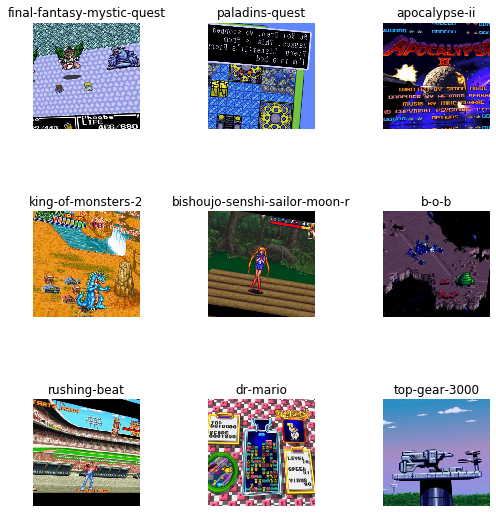

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.995893,1.261487,0.255222,04:35
1,1.085445,0.664587,0.142932,04:30
2,0.704884,0.458825,0.097858,04:32
3,0.537362,0.415826,0.087249,04:31


In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=5)

[('super-mario-all-stars-super-mario-bros',
  'super-mario-all-stars-super-mario-bros-the-lost-levels',
  13),
 ('mega-man-x3', 'mega-man-x', 11),
 ('mega-man-x2', 'mega-man-x', 10),
 ('go-go-ackman-3', 'go-go-ackman-2', 9),
 ('mega-man-x3', 'mega-man-x2', 9),
 ('dragon-quest-vi', 'dragon-quest-iii', 8),
 ('super-mario-all-stars-super-mario-bros-the-lost-levels',
  'super-mario-all-stars-super-mario-bros',
  8),
 ('mega-man-x2', 'mega-man-x3', 7),
 ('wing-commander', 'wing-commander-the-secret-missions', 7),
 ('donkey-kong-country', 'super-donkey-kong', 6),
 ('jikkyou-oshaberi-parodius', 'gokujou-parodius', 6),
 ('mega-man-7', 'mega-man-x2', 6),
 ('tales-of-phantasia', 'final-fantasy-v', 6),
 ('bishoujo-senshi-sailor-moon-r', 'bishoujo-senshi-sailor-moon', 5),
 ('donkey-kong-country-2-diddy-s-kong-quest', 'donkey-kong-country', 5),
 ('firepower-2000', 'super-swiv', 5),
 ('super-donkey-kong', 'donkey-kong-country', 5)]

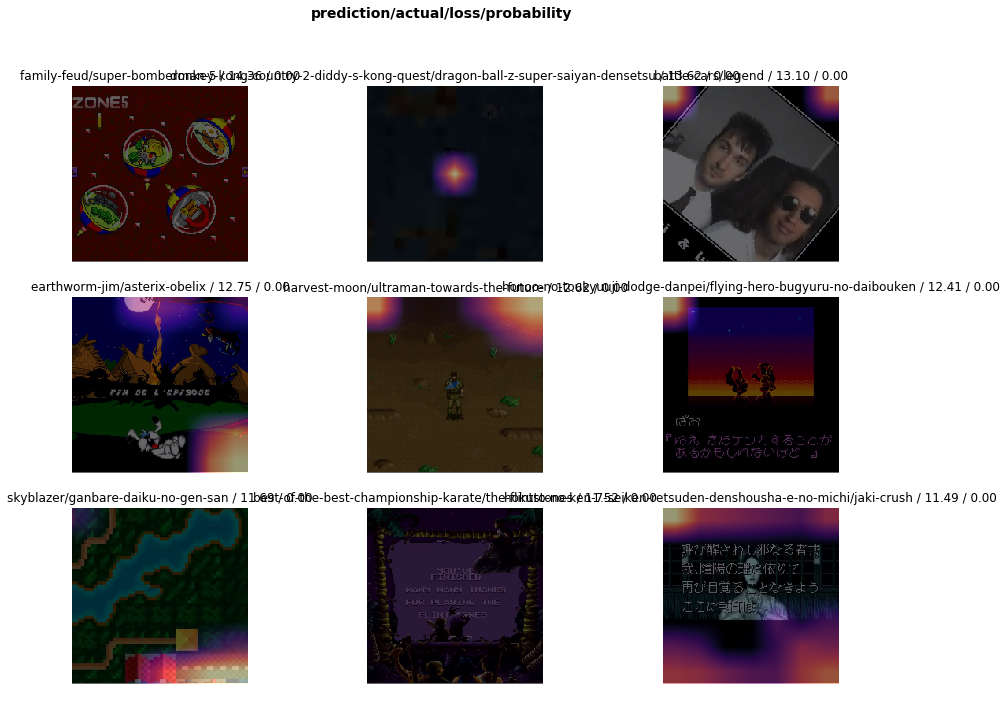

In [10]:
interp.plot_top_losses(9, figsize=(15,11))

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


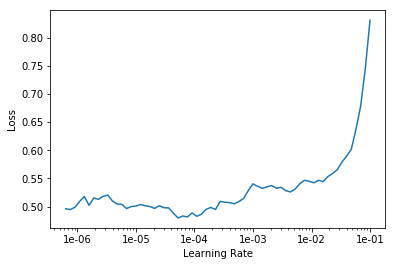

In [12]:
learn.recorder.plot()

In [13]:
learn.save('stage-1')

In [16]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (60704 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
total-carnage,total-carnage,total-carnage,total-carnage,total-carnage
Path: /home/mreishus/screenshots;

Valid: LabelList (15175 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
super-chase-h-q,barbie-super-model,mega-man-x3,apocalypse-ii,fatal-fury-special
Path: /home/mreishus/screenshots;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), str

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(3, max_lr=slice(3e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.543762,0.315844,0.069654,05:47
1,0.391928,0.244177,0.052389,05:47
2,0.251783,0.217211,0.046985,05:47


In [19]:
learn.save('stage-2-larger-lr')

In [20]:
learn.fit_one_cycle(3, max_lr=slice(3e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.220650,0.217250,0.046458,05:47
1,0.210883,0.200531,0.043031,05:47
2,0.190286,0.195937,0.041516,05:47


In [21]:
learn.save('stage-3-larger-lr')

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=5)

[('super-mario-all-stars-super-mario-bros',
  'super-mario-all-stars-super-mario-bros-the-lost-levels',
  15),
 ('super-swiv', 'firepower-2000', 6),
 ('mega-man-x3', 'mega-man-x', 5),
 ('super-mario-all-stars-super-mario-bros-the-lost-levels',
  'super-mario-all-stars-super-mario-bros',
  5)]

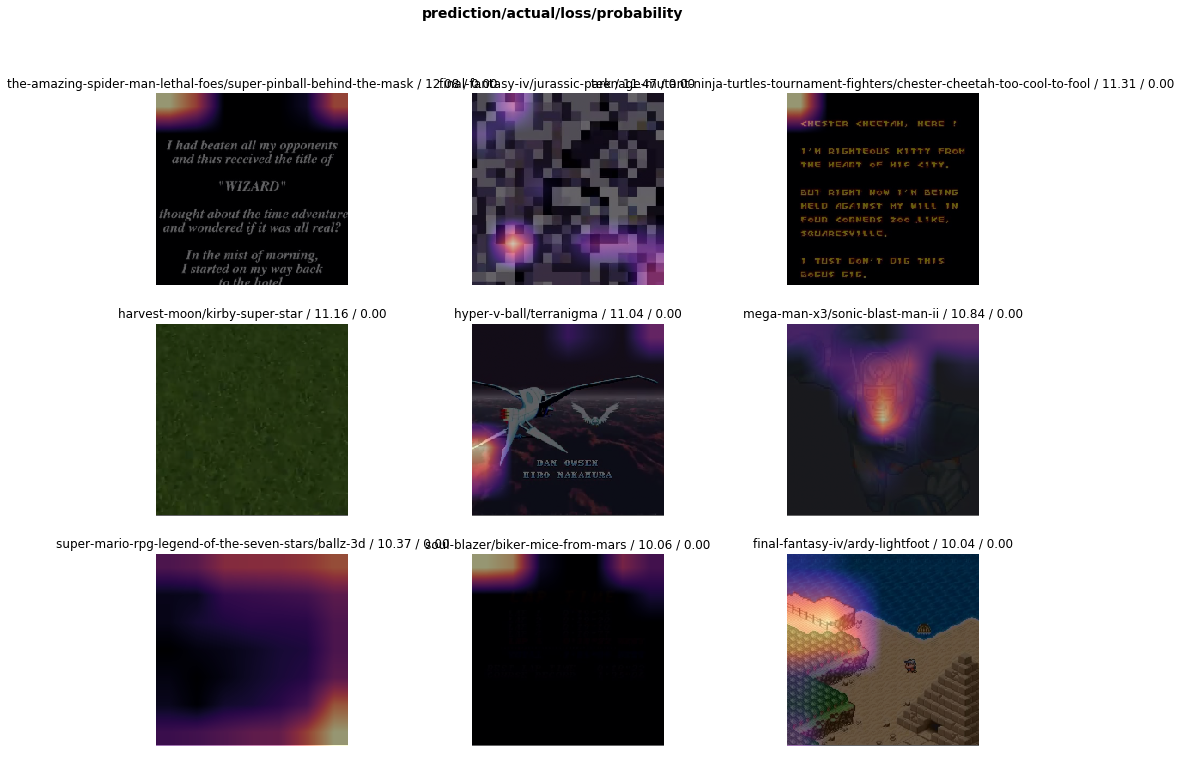

In [23]:
interp.plot_top_losses(9, figsize=(16,12))

In [24]:
learn.export()